In [2]:
import os, sys, csv, json, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
grid_name = 'CISO'
year = '2019'

grid_data_folder = 'grid-emissions'
weather_data_folder = 'weather-station-result'


In [4]:
grid_emissions_file = os.path.join(grid_data_folder, grid_name + '-' + year + '.csv')
SF_weather_file = os.path.join(weather_data_folder, 'KSFO' + '-' + year + '.csv')
LA_weather_file = os.path.join(weather_data_folder, 'KLAX' + '-' + year + '.csv')

In [5]:
df_SF_weather = pd.read_csv(SF_weather_file, usecols=['date_time', 'dry_bulb'], infer_datetime_format=True)
df_LA_weather = pd.read_csv(LA_weather_file, usecols=['date_time', 'dry_bulb'], infer_datetime_format=True)
df_grid_emissions = pd.read_csv(grid_emissions_file, usecols=['datetime_local', 'consumed_co2e_rate_kg_per_mwh_for_electricity'], infer_datetime_format=True)

In [6]:
df_SF_weather.head()

,date_time,dry_bulb
0,2019-01-01-00:00,10.661538
1,2019-01-01-01:00,10.538462
2,2019-01-01-02:00,9.876923
3,2019-01-01-03:00,9.223077
4,2019-01-01-04:00,8.561538


In [7]:
df_LA_weather.shape, df_SF_weather.shape, df_grid_emissions.shape

((8760, 2), (8760, 2), (8760, 2))

In [8]:
# Merge weather data on date_time column
df_SF_weather.rename(columns={'dry_bulb': 'SF_dry_bulb'}, inplace=True)
df_LA_weather.rename(columns={'dry_bulb': 'LA_dry_bulb'}, inplace=True)

df_CA_weather = df_SF_weather.merge(df_LA_weather, on='date_time', how='left')

In [9]:
df_CA_weather.head()

,date_time,SF_dry_bulb,LA_dry_bulb
0,2019-01-01-00:00,10.661538,10.757143
1,2019-01-01-01:00,10.538462,10.238462
2,2019-01-01-02:00,9.876923,9.723077
3,2019-01-01-03:00,9.223077,7.930769
4,2019-01-01-04:00,8.561538,7.446154


In [10]:
# drop datetime_local column from df_grid_emissions
df_grid_emissions.drop(columns=['datetime_local'], inplace=True)
df_grid_emissions.head()

,consumed_co2e_rate_kg_per_mwh_for_electricity
0,308.79
1,309.58
2,314.50
3,316.74
4,316.34


In [11]:
# concatenate df_CA_weather and df_grid_emissions by columns on index
df_CA_weather_grid = pd.concat([df_CA_weather, df_grid_emissions], axis=1)


In [12]:
df_CA_weather_grid.head()

,date_time,SF_dry_bulb,LA_dry_bulb,consumed_co2e_rate_kg_per_mwh_for_electricity
0,2019-01-01-00:00,10.661538,10.757143,308.79
1,2019-01-01-01:00,10.538462,10.238462,309.58
2,2019-01-01-02:00,9.876923,9.723077,314.50
3,2019-01-01-03:00,9.223077,7.930769,316.74
4,2019-01-01-04:00,8.561538,7.446154,316.34


In [13]:
# create columns for month, day of week, and hour of day

df_CA_weather_grid['date_time'] = pd.to_datetime(df_CA_weather_grid['date_time'])

In [14]:
df_CA_weather_grid.dtypes

date_time                                        datetime64[ns]
SF_dry_bulb                                             float64
LA_dry_bulb                                             float64
consumed_co2e_rate_kg_per_mwh_for_electricity           float64
dtype: object

In [15]:
#create columns for month, day of week, and hour of day
df_CA_weather_grid['month'] = df_CA_weather_grid['date_time'].dt.month

df_CA_weather_grid['day_of_week'] = df_CA_weather_grid['date_time'].dt.dayofweek

df_CA_weather_grid['hour_of_day'] = df_CA_weather_grid['date_time'].dt.hour

In [16]:
df_CA_weather_grid.describe()

,SF_dry_bulb,LA_dry_bulb,consumed_co2e_rate_kg_per_mwh_for_electricity,month,day_of_week,hour_of_day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,14.747676,17.429598,242.589685,6.526027,2.994521,11.500000
std,4.348677,4.174443,68.303731,3.448048,2.000107,6.922582
min,4.000000,5.892308,73.360000,1.000000,0.000000,0.000000
25%,11.976923,14.307692,190.765000,4.000000,1.000000,5.750000
50%,14.030769,17.207692,247.475000,7.000000,3.000000,11.500000
75%,17.284615,20.230769,302.375000,10.000000,5.000000,17.250000
max,36.392308,34.992308,381.460000,12.000000,6.000000,23.000000


In [57]:
# create one hot encoded columns for all months, days of week, and hours of day
df_CA_weather_grid = pd.get_dummies(df_CA_weather_grid, columns=['month', 'day_of_week', 'hour_of_day'])

In [58]:
df_CA_weather_grid.head()

,date_time,SF_dry_bulb,LA_dry_bulb,consumed_co2e_rate_kg_per_mwh_for_electricity,month_1,month_2,month_3,month_4,month_5,month_6,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,2019-01-01 00:00:00,10.661538,10.757143,308.79,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 01:00:00,10.538462,10.238462,309.58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 02:00:00,9.876923,9.723077,314.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 03:00:00,9.223077,7.930769,316.74,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 04:00:00,8.561538,7.446154,316.34,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='date_time'>

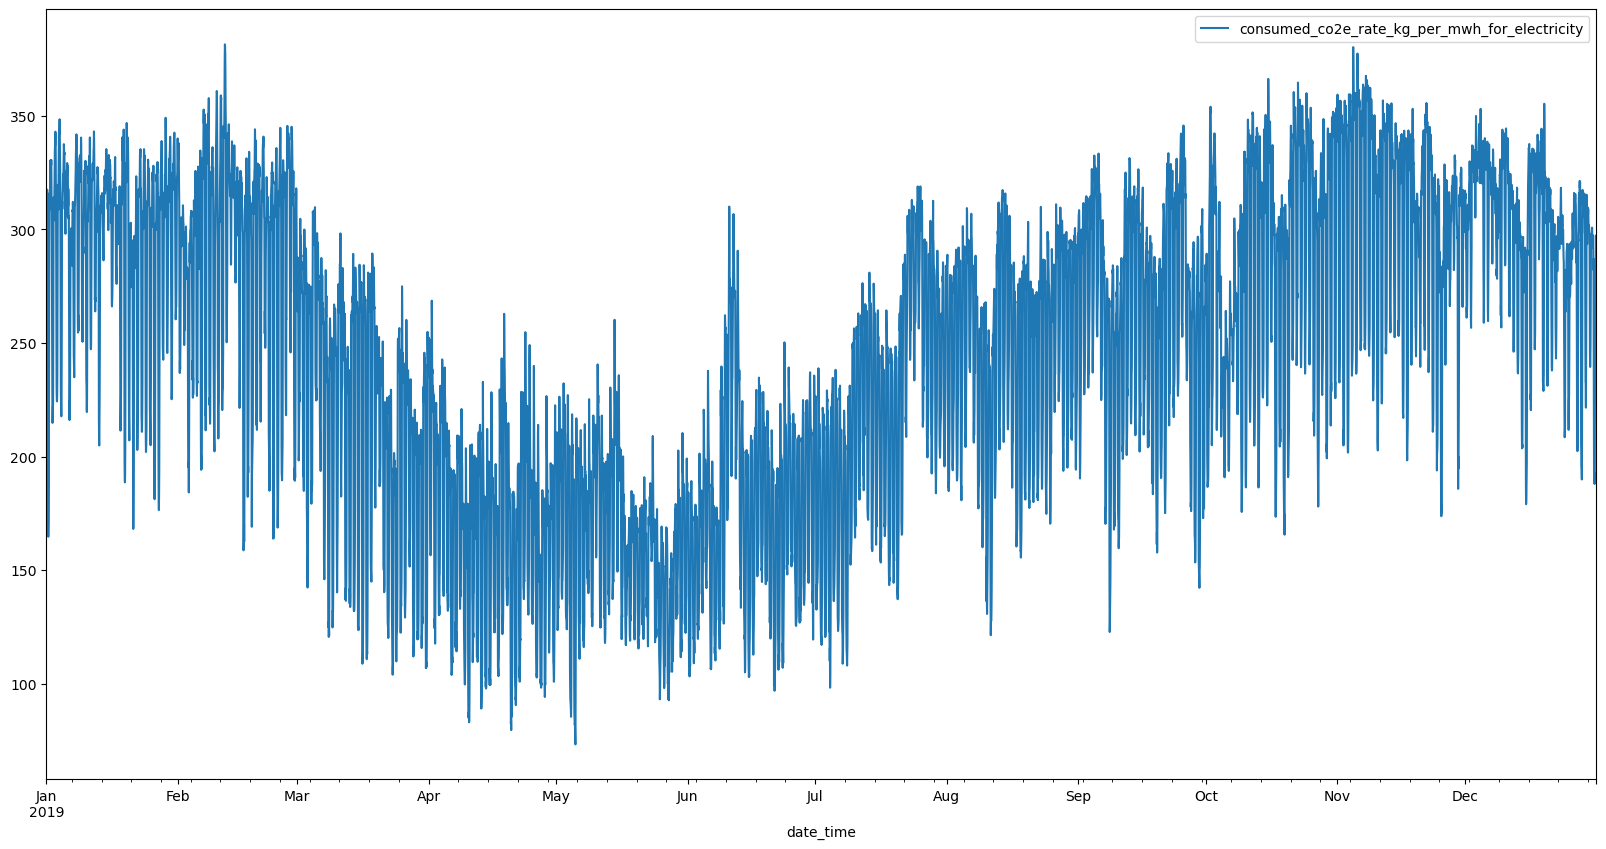

In [59]:
df_CA_weather_grid.plot(x='date_time', y='consumed_co2e_rate_kg_per_mwh_for_electricity', figsize=(20,10))

In [60]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [61]:
# use standard scalar on df_CA_weather_grid to scale columns 'SF_dry_bulb', 'LA_dry_bulb'
scaler = StandardScaler()

df_CA_weather_grid[['SF_dry_bulb', 'LA_dry_bulb']] = scaler.fit_transform(df_CA_weather_grid[['SF_dry_bulb', 'LA_dry_bulb']])

In [62]:
df_CA_weather_grid.head()

,date_time,SF_dry_bulb,LA_dry_bulb,consumed_co2e_rate_kg_per_mwh_for_electricity,month_1,month_2,month_3,month_4,month_5,month_6,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,2019-01-01 00:00:00,-0.939681,-1.598497,308.79,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 01:00:00,-0.967985,-1.722756,309.58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 02:00:00,-1.120118,-1.846225,314.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 03:00:00,-1.270482,-2.275602,316.74,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 04:00:00,-1.422614,-2.391700,316.34,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X = df_CA_weather_grid.drop(columns=['date_time', 'consumed_co2e_rate_kg_per_mwh_for_electricity'])
y = df_CA_weather_grid['consumed_co2e_rate_kg_per_mwh_for_electricity']

In [64]:
X.head()

,SF_dry_bulb,LA_dry_bulb,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,-0.939681,-1.598497,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.967985,-1.722756,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.120118,-1.846225,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.270482,-2.275602,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.422614,-2.391700,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y.head()

0    308.79
1    309.58
2    314.50
3    316.74
4    316.34
Name: consumed_co2e_rate_kg_per_mwh_for_electricity, dtype: float64

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7008, 45), (1752, 45), (7008,), (1752,))

In [91]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# predict
y_pred_train_linreg = linreg.predict(X_train)
y_pred_test_linreg = linreg.predict(X_test)

# MSE and RMSE
linreg_mse_train = mean_squared_error(y_train, y_pred_train_linreg)
linreg_mse_test = mean_squared_error(y_test, y_pred_test_linreg)
linreg_rmse_train = np.sqrt(linreg_mse_train)
linreg_rmse_test = np.sqrt(linreg_mse_test)

# r2 score
linreg_r2_train = r2_score(y_train, y_pred_train_linreg)
linreg_r2_test = r2_score(y_test, y_pred_test_linreg)

In [94]:
# Make a table of results for train and test errors
d = {'train': [linreg_mse_train, linreg_rmse_train, linreg_r2_train], 'test': [linreg_mse_test, linreg_rmse_test, linreg_r2_test]}
df_linreg_results = pd.DataFrame(data=d, index=['MSE', 'RMSE', 'R2'])
print('Simple Multi-Linear Regression:')
df_linreg_results

Simple Multi-Linear Regression:


,train,test
MSE,740.070654,774.464745
RMSE,27.204240,27.829207
R2,0.842351,0.829452


In [106]:
# polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

polyreg = LinearRegression(fit_intercept=False)
polyreg.fit(X_train_poly, y_train)

# predict
y_pred_poly_train = polyreg.predict(X_train_poly)
y_pred_poly_test = polyreg.predict(X_test_poly)

# MSE and RMSE
polyreg_mse_train = mean_squared_error(y_train, y_pred_poly_train)
polyreg_rmse_train = np.sqrt(polyreg_mse_train)
polyreg_mse_test = mean_squared_error(y_test, y_pred_poly_test)
polyreg_rmse_test = np.sqrt(polyreg_mse_test)

# r2 score
polyreg_r2_train = r2_score(y_train, y_pred_poly_train)
polyreg_r2_test = r2_score(y_test, y_pred_poly_test)

In [107]:
# Make a table of results for train and test errors
d = {'train': [polyreg_mse_train, polyreg_rmse_train, polyreg_r2_train], 'test': [polyreg_mse_test, polyreg_rmse_test, polyreg_r2_test]}
df_polyreg_results = pd.DataFrame(data=d, index=['MSE', 'RMSE', 'R2'])
print('Polynomial Regression (degree=2):')
df_polyreg_results

Polynomial Regression (degree=2):


,train,test
MSE,453.333748,535.270820
RMSE,21.291636,23.135921
R2,0.903431,0.882126


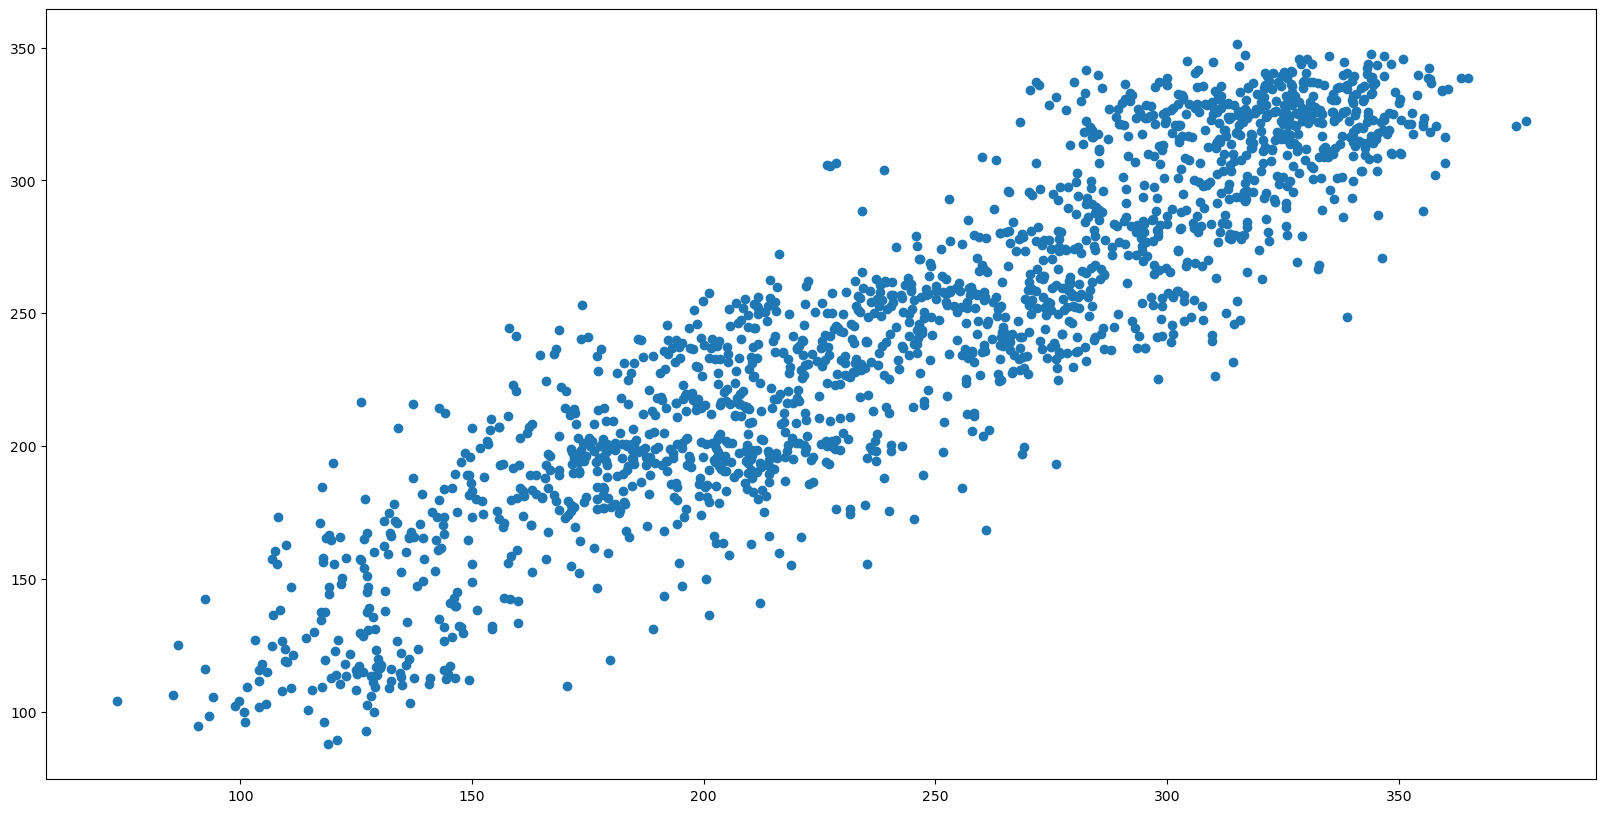

In [110]:
plt.figure(figsize=(20,10))

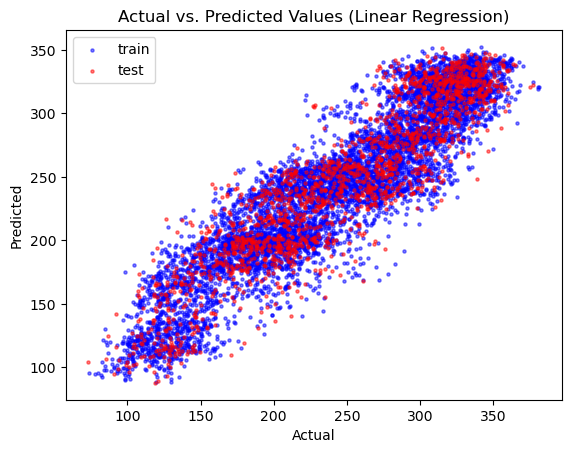

In [116]:
# plot actual vs predicted values for train and test sets
plt.scatter(y_train, y_pred_train_linreg, color='blue', label='train', s=5, alpha=.5)
plt.scatter(y_test, y_pred_test_linreg, color='red', label='test', s=5, alpha = .5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.legend()


In [117]:
# Ridge Regression
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

# predict
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# MSE and RMSE
ridge_mse_train = mean_squared_error(y_train, y_pred_train_ridge)
ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_mse_test = mean_squared_error(y_test, y_pred_test_ridge)
ridge_rmse_test = np.sqrt(ridge_mse_test)

# r2 score
ridge_r2_train = r2_score(y_train, y_pred_train_ridge)
ridge_r2_test = r2_score(y_test, y_pred_test_ridge)


c:\Users\trent\.conda\envs\idep\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [119]:
# Make a table of results for train and test errors
d = {'train': [ridge_mse_train, ridge_rmse_train, ridge_r2_train], 'test': [ridge_mse_test, ridge_rmse_test, ridge_r2_test]}
df_ridge_results = pd.DataFrame(data=d, index=['MSE', 'RMSE', 'R2'])
print('Ridge Regression:')
df_ridge_results

Ridge Regression:


,train,test
MSE,783.848507,815.496951
RMSE,27.997295,28.556907
R2,0.833025,0.820416


In [120]:
# Lasso Regression
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

# predict
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

# MSE and RMSE
lasso_mse_train = mean_squared_error(y_train, y_pred_train_lasso)
lasso_rmse_train = np.sqrt(lasso_mse_train)
lasso_mse_test = mean_squared_error(y_test, y_pred_test_lasso)
lasso_rmse_test = np.sqrt(lasso_mse_test)

# r2 score
lasso_r2_train = r2_score(y_train, y_pred_train_lasso)
lasso_r2_test = r2_score(y_test, y_pred_test_lasso)


c:\Users\trent\.conda\envs\idep\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [121]:
# Make a table of results for train and test errors
d = {'train': [lasso_mse_train, lasso_rmse_train, lasso_r2_train], 'test': [lasso_mse_test, lasso_rmse_test, lasso_r2_test]}
df_lasso_results = pd.DataFrame(data=d, index=['MSE', 'RMSE', 'R2'])
print('Lasso Regression:')
df_lasso_results

Lasso Regression:


,train,test
MSE,2303.850496,2245.362930
RMSE,47.998443,47.385261
R2,0.509236,0.505539


In [122]:
# use ridge regression on the polynomial features data
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train_poly, y_train)

# predict
y_pred_train_ridge_poly = ridge.predict(X_train_poly)
y_pred_test_ridge_poly = ridge.predict(X_test_poly)

# MSE and RMSE
ridge_mse_train_poly = mean_squared_error(y_train, y_pred_train_ridge_poly)
ridge_rmse_train_poly = np.sqrt(ridge_mse_train_poly)
ridge_mse_test_poly = mean_squared_error(y_test, y_pred_test_ridge_poly)
ridge_rmse_test_poly = np.sqrt(ridge_mse_test_poly)

# r2 score
ridge_r2_train_poly = r2_score(y_train, y_pred_train_ridge_poly)
ridge_r2_test_poly = r2_score(y_test, y_pred_test_ridge_poly)

c:\Users\trent\.conda\envs\idep\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [123]:
# Make a table of results for train and test errors
d = {'train': [ridge_mse_train_poly, ridge_rmse_train_poly, ridge_r2_train_poly], 'test': [ridge_mse_test_poly, ridge_rmse_test_poly, ridge_r2_test_poly]}
df_ridge_poly_results = pd.DataFrame(data=d, index=['MSE', 'RMSE', 'R2'])
print('Ridge Regression (polynomial features):')
df_ridge_poly_results

Ridge Regression (polynomial features):


,train,test
MSE,480.682954,545.454481
RMSE,21.924483,23.354967
R2,0.897605,0.879883
